# 1.数据导入

In [150]:
import pandas as pd
import xlrd
import csv
import codecs
#xlsx转为csv
def xlsx_to_csv(path,doc_name):
    workbook = xlrd.open_workbook(path)
    table = workbook.sheet_by_index(0)
    with codecs.open(doc_name, 'w', encoding='utf-8') as f:
        write = csv.writer(f)
        for row_num in range(table.nrows):
            row_value = table.row_values(row_num)
            write.writerow(row_value)

if __name__ == '__main__':
    xlsx_to_csv('试题2数据.xlsx','data.csv')

In [151]:
#读取csv
import pandas as pd
data = pd.read_csv('data.csv')
data_org = pd.read_csv('data.csv')#原始

# 2.数据探索

In [152]:
#2.1缺失值检验、数据类型检验
print('缺失值统计：\n', data.isnull().sum()) #统计缺失值
print('数据类型统计：\n',data.dtypes)  #数据类型

缺失值统计：
 id                        0
y                         0
city                      0
mar_status                0
age                       0
xaccount_age              0
cred_limit                0
this_bill_rate            0
this_bill_mp              0
last_mp_days              0
six_bill_num              0
six_bill_avg_amt          0
six_cycle_mp_num          0
six_cycle_mp_avg_amt      0
six_bill_avg_debt_rate    0
six_bill_low_repay_num    0
six_optial_mp_num         0
six_optial_mp_avg_amt     0
epp_nbr_12m               0
alop_nbr_12m              0
epp_avg_amt_12m           0
alop_avg_amt_12m          0
consume_num_session12     0
consume_num_session6      0
consume_num_session3      0
consume_num_session       0
consume_amt_session12     0
consume_amt_session6      0
consume_amt_session3      0
consume_amt_session       0
month_avg_use_year        0
month_avg_use_month6      0
month_avg_use_month3      0
dtype: int64
数据类型统计：
 id                        float64
y           

In [153]:
'''
Pandas提供了duplicated、Index.duplicated、drop_duplicates函数来标记及删除重复记录

duplicated函数用于标记Series中的值、DataFrame中的记录行是否是重复，重复为True，不重复为False

pandas.DataFrame.duplicated(self, subset=None, keep='first')

pandas.Series.duplicated(self, keep='first')
--------------------- 

df.index.duplicated()#默认keep='first',第二、五、七行被标记为重复
df.index.duplicated(keep='last')#第一、二、三、四被标记为重复
df[df.index.duplicated()]#获取重复记录行
df[~df.index.duplicated('last')]#获取不重复记录行
'''
#如果重复值
data.index.duplicated()
for  i in data.index:
    if data.index.duplicated()[i]==True:
        print(i)
        

#df[df.index.duplicated()]#获取重复记录行

In [154]:
data.shape

(10000, 33)

In [155]:
data.describe().T.to_csv('data_describe1.csv')
#data.describe(percentiles=[.05, .25, .75, .95])

数据结合字典分析：
1.无缺失值（观察 count都等于1w，无缺失值）
2.观察极大极小值 min、max发现，six_optial_mp_num（办理万用金次数）six_optial_mp_avg_amt（办理万用金金额）均为0，可以删除
3.通过观察，发现
id
y
city
mar_status
为序列值，查看直方图
其他为序列值 
查看直方图
4.
six_bill_avg_debt_rate	区间	近六个月平均负债率
six_bill_avg_amt	区间	近六个月平均账单金额
为负数


In [156]:
#剔除 six_optial_mp_num（办理万用金次数）six_optial_mp_avg_amt（办理万用金金额）
#X=titanic.drop(['row.names','name','survived'],axis=1) 

data = data.drop(['six_optial_mp_num','six_optial_mp_avg_amt'],axis=1)

In [157]:
# id 没什么用处 也删掉
data = data.drop(['id'],axis=1)

In [158]:
#把是负数的替换为0 处理负值
'''data.loc[data['six_bill_avg_amt']<0,'six_bill_avg_amt']=0
data.loc[data['six_bill_avg_debt_rate']<0,'six_bill_avg_debt_rate']=0
'''
#data['six_bill_avg_amt']=data['six_bill_avg_amt']<=0

#data.ix[data['six_bill_avg_amt']<=0,'six_bill_avg_amt']=0

"data.loc[data['six_bill_avg_amt']<0,'six_bill_avg_amt']=0\ndata.loc[data['six_bill_avg_debt_rate']<0,'six_bill_avg_debt_rate']=0\n"

In [159]:
data.shape

(10000, 30)

In [160]:
#  把结果集放到csv里
data.to_csv('data1.csv')    #index=False，写入的时候不写入列的索引序号

In [161]:
#分析几个序列变量
data['city'].unique().shape #140个
data.groupby('city').size()
data

y   city  mar_status   age  xaccount_age  cred_limit  this_bill_rate  \
0     0.0   52.0         0.0  32.0          10.0     20000.0        0.162971   
1     0.0   84.0         2.0  28.0          17.0      2500.0        0.000000   
2     0.0   35.0         0.0  34.0          17.0     28500.0        0.792989   
3     0.0   40.0         0.0  28.0          17.0      5000.0        1.001600   
4     0.0   21.0         2.0  26.0          19.0     60000.0        0.990300   
5     0.0    1.0         1.0  36.0         138.0     46000.0        0.418607   
6     0.0   68.0         2.0  27.0          62.0    117500.0        0.384213   
7     0.0   44.0         0.0  32.0           8.0      2000.0        0.611850   
8     0.0   19.0         0.0  53.0          87.0     80000.0        0.706950   
9     0.0    1.0         1.0  48.0          18.0     31000.0        0.629342   
10    0.0   76.0         0.0  36.0          15.0     32500.0        0.641026   
11    0.0   18.0         0.0  37.0          19.0     42000.0        0.723667   
12    0.0  102.0         0.0  24.0          22.0      1000.0        0.724830   
13    0.0   30.0         0.0  27.0          11.0     22000.0        0.837750   
14    0.0  131.0         2.0  34.0          10.0     38000.0        0.015727   
15    0.0    0.0         0.0  28.0          10.0     14000.0        0.395021   
16    0.0   74.0         0.0  44.0           5.0     50000.0        0.171394   
17    0.0  118.0         0.0  34.0          22.0     22500.0        0.831415   
18    0.0   84.0         2.0  33.0          54.0     10000.0        1.022400   
19    0.0    1.0         0.0  39.0          65.0     77000.0        0.041395   
20    0.0   75.0         0.0  31.0          10.0     25000.0        0.889634   
21    0.0    1.0         2.0  26.0          23.0      4000.0        1.000000   
22    0.0   38.0         0.0  34.0           6.0     30000.0        1.000267   
23    0.0   96.0         0.0  44.0          63.0     24000.0        0.117016   
24    0.0  104.0         0.0  29.0           6.0      6000.0        0.000000   
25    0.0   18.0         0.0  40.0           9.0     30000.0        0.982352   
26    0.0  121.0         1.0  48.0          32.0     52500.0        0.969464   
27    0.0   11.0         0.0  35.0          11.0     12000.0        0.861777   
28    0.0   68.0         0.0  45.0           7.0      3000.0        5.628493   
29    0.0   26.0         0.0  26.0          15.0     12000.0        0.898250   
...   ...    ...         ...   ...           ...         ...             ...   
9970  1.0   38.0         2.0  28.0          12.0     60000.0        0.075622   
9971  1.0   32.0         0.0  36.0          18.0     45000.0        0.293826   
9972  1.0  131.0         0.0  44.0          19.0     56000.0        0.330176   
9973  1.0  121.0         0.0  30.0          21.0    130000.0        0.320377   
9974  1.0   83.0         0.0  37.0           8.0     20000.0        1.224000   
9975  1.0   72.0         2.0  23.0          15.0     60000.0        0.472209   
9976  1.0   75.0         1.0  31.0          21.0      6000.0        1.281383   
9977  1.0   46.0         0.0  31.0           3.0     20000.0        0.645833   
9978  1.0  129.0         0.0  32.0          15.0     30000.0        0.993416   
9979  1.0   46.0         2.0  31.0          65.0     54000.0        0.148803   
9980  1.0   74.0         2.0  24.0           7.0     15000.0        0.188155   
9981  1.0   18.0         0.0  40.0           9.0     10000.0        0.739503   
9982  1.0  125.0         0.0  32.0          13.0      4000.0        0.662710   
9983  1.0  102.0         2.0  22.0           2.0     15000.0        0.393017   
9984  1.0    0.0         0.0  33.0           7.0     30000.0        0.902767   
9985  1.0    2.0         0.0  27.0           2.0      3000.0        0.106000   
9986  1.0  102.0         2.0  24.0           2.0     15000.0        0.810670   
9987  1.0   15.0         2.0  32.0          15.0      8000.0        1.000000   
9988  1.

In [162]:
# 发现city是坐标 平均分布  无实际意义 删除
data = data.drop(['city'],axis=1)

In [163]:
#分析几个序列变量  mar_status-- 这个需要降维 哑变量
data['mar_status'].unique().shape 
data.groupby('mar_status').size()
#data
#data.hist(column='mar_status',grid=True,bins=3)

mar_status
0.0    6472
1.0     302
2.0    3226
dtype: int64

In [164]:
print(pd.get_dummies(data['mar_status'],prefix='mar_status'))
dummies=pd.get_dummies(data['mar_status'],prefix='mar_status')
data=pd.concat( [data, dummies], axis = 1 )#追加哑变量，
data = data.drop(['mar_status'],axis=1)

      mar_status_0.0  mar_status_1.0  mar_status_2.0
0                  1               0               0
1                  0               0               1
2                  1               0               0
3                  1               0               0
4                  0               0               1
5                  0               1               0
6                  0               0               1
7                  1               0               0
8                  1               0               0
9                  0               1               0
10                 1               0               0
11                 1               0               0
12                 1               0               0
13                 1               0               0
14                 0               0               1
15                 1               0               0
16                 1               0               0
17                 1               0          

In [165]:
data.shape

(10000, 31)

In [166]:
data.head()

y   age  xaccount_age  cred_limit  this_bill_rate  this_bill_mp  \
0  0.0  32.0          10.0     20000.0        0.162971       1213.15   
1  0.0  28.0          17.0      2500.0        0.000000       2165.66   
2  0.0  34.0          17.0     28500.0        0.792989      21336.18   
3  0.0  28.0          17.0      5000.0        1.001600       4668.30   
4  0.0  26.0          19.0     60000.0        0.990300      56447.10   

   last_mp_days  six_bill_num  six_bill_avg_amt  six_cycle_mp_num  \
0          15.0           6.0           5121.82               1.0   
1        9999.0           6.0           1652.90               0.0   
2        9999.0           6.0          15406.17               0.0   
3        9999.0           6.0          12634.14               0.0   
4        9999.0           6.0          38870.11               0.0   

        ...        consume_amt_session12  consume_amt_session6  \
0       ...                     70173.00              29294.00   
1       ...                     19515.38               3475.60   
2       ...                    206655.62             114284.77   
3       ...                    227540.00              87870.00   
4       ...                    549835.93             290014.88   

   consume_amt_session3  consume_amt_session  month_avg_use_year  \
0              16773.00               1249.0            0.350865   
1               3130.88                  0.0            0.661538   
2              78978.75              22600.2            0.731524   
3              14900.00               5000.0            0.948083   
4             176430.00              59418.0            0.872755   

   month_avg_use_month6  month_avg_use_month3  mar_status_0.0  mar_status_1.0  \
0              0.244117              0.279550               1               0   
1              0.231707              0.417451               0               0   
2              0.703291              0.923728               1               0   
3              0.976333              0.993333               1               0   
4              0.878833              0.980167               0               0   

   mar_status_2.0  
0               0  
1               1  
2               0  
3               0  
4               1  

[5 rows x 31 columns]

In [167]:
data.to_csv('data1.csv') #将整理好的数据集合放到data1

#几个序列型
alop_nbr_12m 近一年办理alop次数
six_bill_low_repay_num近六个月还款金额为最低还款的次数
six_bill_num 近六个月的所有账单次数

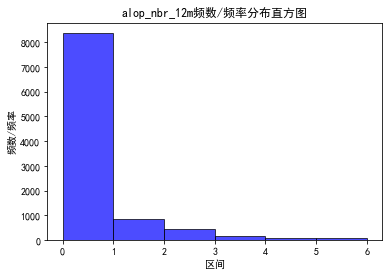

In [130]:
#画图
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
x1=data['alop_nbr_12m']
y1=np.arange(7)
plt.hist(x1, bins=y1, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("alop_nbr_12m频数/频率分布直方图")
plt.show()


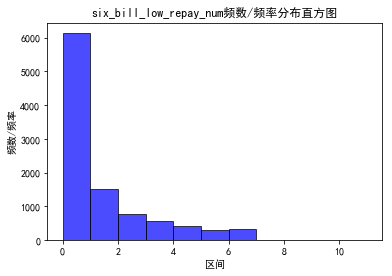

In [131]:
x1=data['six_bill_low_repay_num']
y1=np.arange(12)
plt.hist(x1, bins=y1, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("six_bill_low_repay_num频数/频率分布直方图")
plt.show()

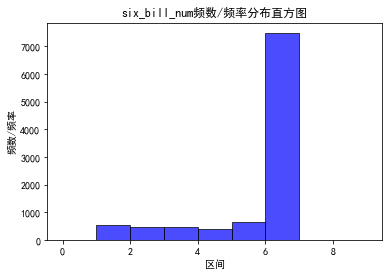

In [132]:
x1=data['six_bill_num']
y1=np.arange(10)
plt.hist(x1, bins=y1, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("six_bill_num频数/频率分布直方图")
plt.show()

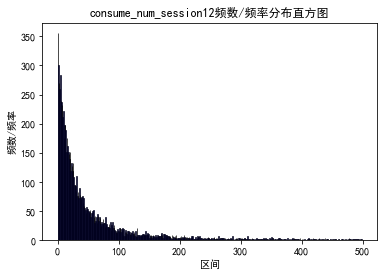

In [95]:

x1=data['consume_num_session12']
y1=np.arange(500)
plt.hist(x1, bins=y1, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("consume_num_session12频数/频率分布直方图")
plt.show()


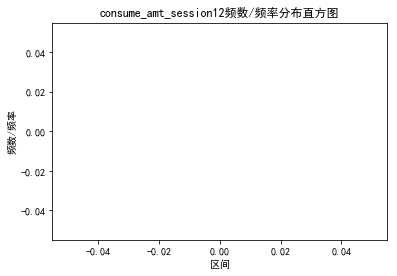

In [101]:

x1=data['consume_amt_session12']
#y1=np.arange(1)
plt.hist(x1, bins=y1, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("consume_amt_session12频数/频率分布直方图")
plt.show()

AttributeError: 'Series' object has no attribute 'boxplot'

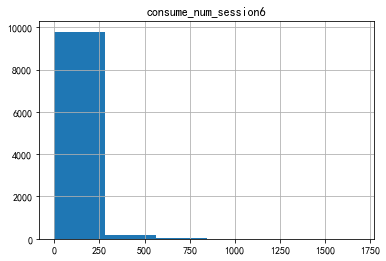

In [44]:
#consume_num_session12
data['consume_num_session6'].unique().shape 
data.groupby('consume_num_session6').size()
#plt.figure()
data.hist(column='consume_num_session6',grid=True,bins=6,xlabelsize=10)
data['consume_num_session6'].
#consume_num_session6
#consume_num_session3
#consume_num_session


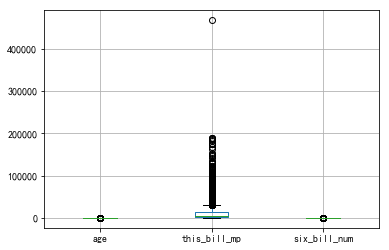

In [13]:
#异常值分析
# 选出 3,7,9做箱线图，选出年龄来做图观察
import matplotlib.pyplot as plt#导入图像库
%matplotlib inline
data_box = data.iloc[:,[3,7,9]]
data_box.boxplot()


In [14]:
#统计分析变量
# 据上次分期的天数
data.groupby('last_mp_days').size() 
data['last_mp_days'].value_counts()  

9999.0    6397
30.0       435
60.0       198
91.0       111
119.0      100
181.0       61
11.0        51
211.0       39
272.0       37
150.0       37
12.0        32
42.0        26
13.0        24
242.0       23
364.0       23
29.0        23
43.0        23
41.0        22
59.0        22
100.0       22
16.0        22
395.0       21
15.0        20
303.0       20
14.0        20
10.0        19
17.0        19
46.0        18
334.0       17
425.0       17
          ... 
2915.0       1
1429.0       1
595.0        1
1841.0       1
745.0        1
2598.0       1
991.0        1
618.0        1
1285.0       1
2051.0       1
1143.0       1
1226.0       1
433.0        1
1140.0       1
2144.0       1
2297.0       1
154.0        1
386.0        1
776.0        1
881.0        1
2604.0       1
1115.0       1
2333.0       1
874.0        1
1138.0       1
622.0        1
611.0        1
1871.0       1
387.0        1
1031.0       1
Name: last_mp_days, dtype: int64

In [13]:
# 载入seaborn作图
import seaborn as sns
import re  # Regular Expression operations
import matplotlib.pyplot as plt
%matplotlib inline

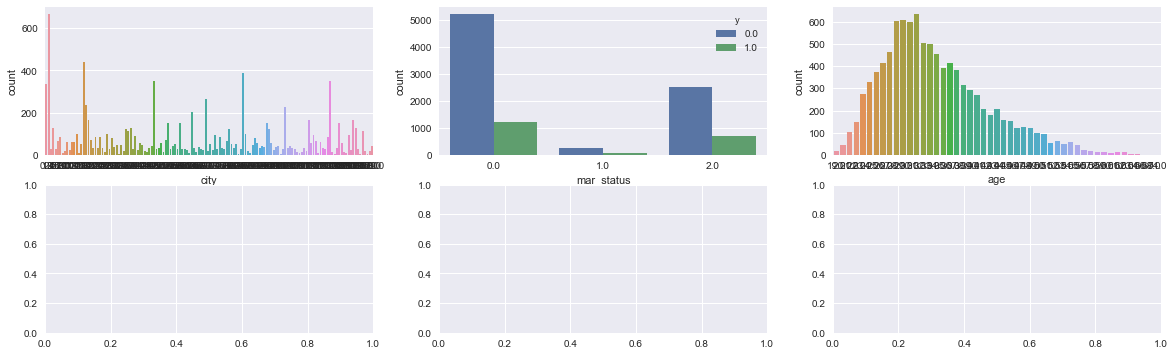

In [17]:
f,ax = plt.subplots(2,3,figsize=(20,6))
sns.countplot('city',data=data,ax=ax[0,0])
sns.countplot('mar_status',data=data,hue='y',ax=ax[0,1])
sns.countplot('age',data=data,ax=ax[0,2])
#plt.hist(data['city'],ax=ax[1,0])
#plt.hist(data['age'],ax=ax[2,0])

TypeError: inner() got multiple values for argument 'ax'

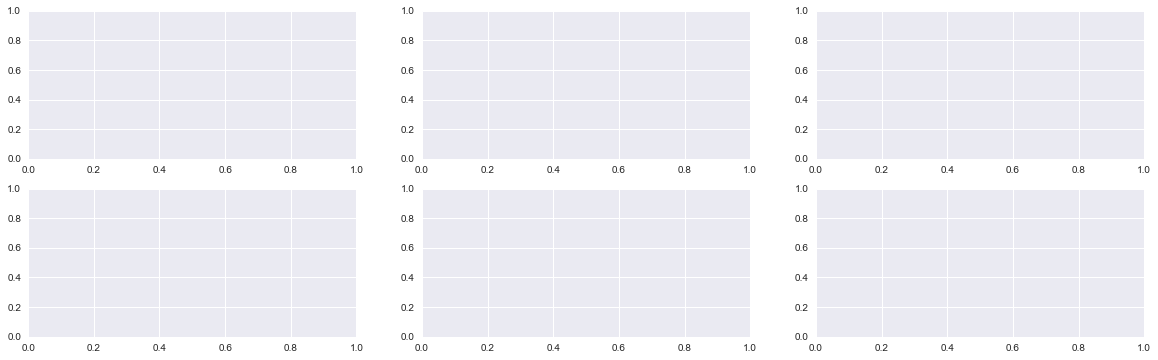

In [172]:
f,ax = plt.subplots(2,3,figsize=(20,6))
plt.hist(data['city'],ax=[0,0])#直方图
plt.hist(data['age'],ax=[0,1])#直方图

In [16]:
##最佳特征筛选与feature_selection  --本文介绍的是如何利用scikit learn中的feature_selection模块来筛选最佳特征。
#https://blog.csdn.net/the_lastest/article/details/79112746
#分离数据特征与预测目标
y=data['y'] # 提取出survived 列
#X=data.drop(['id','y','six_optial_mp_num','six_optial_mp_avg_amt'],axis=1) # 提取除去这三列的其它所有列
X=data.drop(['y'],axis=1) # 提取除去这三列的其它所有列
X.shape

(10000, 29)

In [60]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                               random_state=33)
#对类别维度的特征进行向量化
vec=DictVectorizer()
X_train=vec.fit_transform(X_train.to_dict(orient='records'))
X_test=vec.transform(X_test.to_dict(orient='records'))
len(vec.feature_names_)
#print(vec.feature_names_)#查看转换后的列名
#print(X_train)#查看转换后的训练集


29

In [ ]:
#机器学习的转换方式：将分类变量转换为‘哑变量矩阵’，或者‘指标矩阵’；
df=DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
print(pd.get_dummies(df['key']))
#   a  b  c
# 0  0  1  0
# 1  0  1  0
# 2  1  0  0
# 3  0  0  1
# 4  1  0  0
# 5  0  1  0
 
#加上前缀，方便与其他数据结合
dummies=pd.get_dummies(df['key'],prefix='key')
df_with_dummy=df[['data1']].join(dummies)
print(df_with_dummy)
#   data1  key_a  key_b  key_c
# 0      0      0      1      0
# 1      1      0      1      0
# 2      2      1      0      0
# 3      3      0      0      1
# 4      4      1      0      0
# 5      5      0      1      0

--------------------- 
作者：照片怎么加不上 
来源：CSDN 
原文：https://blog.csdn.net/qq_38788128/article/details/80796776 
版权声明：本文为博主原创文章，转载请附上博文链接！

In [25]:
print(pd.get_dummies(data['mar_status'],prefix='mar_status'))
dummies=pd.get_dummies(data['mar_status'],prefix='mar_status')
data=pd.concat( [data, dummies], axis = 1 )

      mar_status_0.0  mar_status_1.0  mar_status_2.0
0                  1               0               0
1                  0               0               1
2                  1               0               0
3                  1               0               0
4                  0               0               1
5                  0               1               0
6                  0               0               1
7                  1               0               0
8                  1               0               0
9                  0               1               0
10                 1               0               0
11                 1               0               0
12                 1               0               0
13                 1               0               0
14                 0               0               1
15                 1               0               0
16                 1               0               0
17                 1               0          

In [26]:
data

y   city  mar_status   age  xaccount_age  cred_limit  this_bill_rate  \
0     0.0   52.0         0.0  32.0          10.0     20000.0        0.162971   
1     0.0   84.0         2.0  28.0          17.0      2500.0        0.000000   
2     0.0   35.0         0.0  34.0          17.0     28500.0        0.792989   
3     0.0   40.0         0.0  28.0          17.0      5000.0        1.001600   
4     0.0   21.0         2.0  26.0          19.0     60000.0        0.990300   
5     0.0    1.0         1.0  36.0         138.0     46000.0        0.418607   
6     0.0   68.0         2.0  27.0          62.0    117500.0        0.384213   
7     0.0   44.0         0.0  32.0           8.0      2000.0        0.611850   
8     0.0   19.0         0.0  53.0          87.0     80000.0        0.706950   
9     0.0    1.0         1.0  48.0          18.0     31000.0        0.629342   
10    0.0   76.0         0.0  36.0          15.0     32500.0        0.641026   
11    0.0   18.0         0.0  37.0          19.0     42000.0        0.723667   
12    0.0  102.0         0.0  24.0          22.0      1000.0        0.724830   
13    0.0   30.0         0.0  27.0          11.0     22000.0        0.837750   
14    0.0  131.0         2.0  34.0          10.0     38000.0        0.015727   
15    0.0    0.0         0.0  28.0          10.0     14000.0        0.395021   
16    0.0   74.0         0.0  44.0           5.0     50000.0        0.171394   
17    0.0  118.0         0.0  34.0          22.0     22500.0        0.831415   
18    0.0   84.0         2.0  33.0          54.0     10000.0        1.022400   
19    0.0    1.0         0.0  39.0          65.0     77000.0        0.041395   
20    0.0   75.0         0.0  31.0          10.0     25000.0        0.889634   
21    0.0    1.0         2.0  26.0          23.0      4000.0        1.000000   
22    0.0   38.0         0.0  34.0           6.0     30000.0        1.000267   
23    0.0   96.0         0.0  44.0          63.0     24000.0        0.117016   
24    0.0  104.0         0.0  29.0           6.0      6000.0        0.000000   
25    0.0   18.0         0.0  40.0           9.0     30000.0        0.982352   
26    0.0  121.0         1.0  48.0          32.0     52500.0        0.969464   
27    0.0   11.0         0.0  35.0          11.0     12000.0        0.861777   
28    0.0   68.0         0.0  45.0           7.0      3000.0        5.628493   
29    0.0   26.0         0.0  26.0          15.0     12000.0        0.898250   
...   ...    ...         ...   ...           ...         ...             ...   
9970  1.0   38.0         2.0  28.0          12.0     60000.0        0.075622   
9971  1.0   32.0         0.0  36.0          18.0     45000.0        0.293826   
9972  1.0  131.0         0.0  44.0          19.0     56000.0        0.330176   
9973  1.0  121.0         0.0  30.0          21.0    130000.0        0.320377   
9974  1.0   83.0         0.0  37.0           8.0     20000.0        1.224000   
9975  1.0   72.0         2.0  23.0          15.0     60000.0        0.472209   
9976  1.0   75.0         1.0  31.0          21.0      6000.0        1.281383   
9977  1.0   46.0         0.0  31.0           3.0     20000.0        0.645833   
9978  1.0  129.0         0.0  32.0          15.0     30000.0        0.993416   
9979  1.0   46.0         2.0  31.0          65.0     54000.0        0.148803   
9980  1.0   74.0         2.0  24.0           7.0     15000.0        0.188155   
9981  1.0   18.0         0.0  40.0           9.0     10000.0        0.739503   
9982  1.0  125.0         0.0  32.0          13.0      4000.0        0.662710   
9983  1.0  102.0         2.0  22.0           2.0     15000.0        0.393017   
9984  1.0    0.0         0.0  33.0           7.0     30000.0        0.902767   
9985  1.0    2.0         0.0  27.0           2.0      3000.0        0.106000   
9986  1.0  102.0         2.0  24.0           2.0     15000.0        0.810670   
9987  1.0   15.0         2.0  32.0          15.0      8000.0        1.000000   
9988  1.

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33)

In [62]:
X_train.shape

(7500, 29)

In [50]:
vec=DictVectorizer()

In [65]:
'''”##方差选择法
#使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征。使用feature_selection库的VarianceThreshold类来选择特征的代码如下：
from sklearn.feature_selection import VarianceThreshold
#方差选择法，返回值为特征选择后的数据 #参数threshold为方差的阈值
'''
from sklearn.feature_selection import VarianceThreshold 
X=pd.concat([X_train,X_test])  
y=pd.concat([y_train,y_test])
sel = VarianceThreshold(threshold=(.9 * (1 - .9))) 
new_X = sel.fit_transform(X,y)

# 找出需要删除的变量名
to_drop = []
for i in range(len(sel.get_support())):
    if sel.get_support()[i] == False:
        to_drop.append(X.keys()[i])

In [67]:
to_drop

[]

In [69]:
from minepy import MINE
#互信息数
to_drop = []
m = MINE()
for i in X.keys():
    m.compute_score(X[i], y)
    if (m.mic()) < 0.005:
        to_drop.append(i)

In [70]:
to_drop

['mar_status', 'six_bill_num']

In [72]:
#树算法计算特征的信息量：
from sklearn.ensemble import ExtraTreesClassifier 
clf = ExtraTreesClassifier() 
clf.fit(X,y)

# 各个特征重要性 
#print(clf.feature_importances_)
to_drop = []
for i in range(len(clf.feature_importances_)):
    if clf.feature_importances_[i] == 0.0:
        to_drop.append(X.keys()[i])
X = X.drop(to_drop,axis=1)

In [73]:
to_drop

[]

In [74]:
import pandas as pd
import xlrd
import csv
import codecs
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import pearsonr
from minepy import MINE
from sklearn.feature_selection import VarianceThreshold 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score  
from sklearn import metrics

clf1 = LogisticRegression()  
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier()
clf5 = SVC()
clf6 = RandomForestClassifier()

# X:features  y:targets  cv:k  
print(str("LogisticRegression : ") + str(np.mean(cross_val_score(clf1, X, y, cv=5))))
print(str("naive_bayes : ") + str(np.mean(cross_val_score(clf2, X, y, cv=5))))
print(str("KNeighborsClassifier : ") + str(np.mean(cross_val_score(clf3, X, y, cv=5))))
print(str("DecisionTreeClassifier : ") + str(np.mean(cross_val_score(clf4, X, y, cv=5))))
print(str("SVC : ") + str(np.mean(cross_val_score(clf5, X, y, cv=5))))
print(str("RandomForestClassifier : ") + str(np.mean(cross_val_score(clf6, X, y, cv=5))))

LogisticRegression : 0.8211
naive_bayes : 0.7737
KNeighborsClassifier : 0.7994
DecisionTreeClassifier : 0.7856
SVC : 0.8005
RandomForestClassifier : 0.8446


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #导入图像库
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
%matplotlib inline
    #导入数据
  
    #应变量
    Y=data['SeriousDlqin2yrs']
    #自变量，剔除对因变量影响不明显的变量
    X=data.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
    X1=sm.add_constant(X)
    logit=sm.Logit(Y,X1)
    result=logit.fit()
    print(result.summary())

In [63]:
'''在此之前，先简单说介绍一下sklearn.feature_selection中，两个模块（SelectKBest和SelectPercentile）的用法。二者比较相似，前者选择排名在前n个的变量，后者选择排名在前n%的变量；其中排名的方式通过指定参数来确定：对于regression,可以使用f_regression;对于classification,可以使用chi2或者f_classif。此外，此外选择算法内部会根据因变量y的存在与否自主选择有监督或无监督的学习方式。

对于一个数据集来说，是否需要进行特征值的筛选大致标准是：如果筛选后的数据集在某个模型上的表现性能比不筛选后的更低，很明显此时要么是模型选择错误，要么是不该进行特征筛选，或者是特征选择不对。所以在确定好模型后：

第一步：不进行特征筛选，训练模型得出score 
第二步：按等步长筛选特征，训练模型得出score 
第三步：选择score最高的特征组合
'''
#Step 1

from sklearn import tree
#from  sklearn.tree.DecisionTreeClassifier import DecisionTreeClassifier
dt=tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
print ('accuracy: ',dt.score(X_test,y_test))


accuracy:  0.7844


In [75]:
#Step 2
import numpy as np
from sklearn import feature_selection
percentiles=np.array(range(1,100,2),dtype=int)
results=[]
for i in percentiles:
    fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=i) # percentile表示选取前%i 的特征
    X_train_fs=fs.fit_transform(X_train,y_train)
    scores=cross_val_score(dt,X_train_fs,y_train,cv=5) #5折交叉验证，返回5次验证后的scores
    results=np.append(results,scores.mean()) #得到每次取的前%i特征所产生的score的均值
    print(X_train_fs.shape) #可以查看每次的新维度
print(results)

ValueError: Input X must be non-negative.

In [49]:
#主成分分析
#参考 https://blog.csdn.net/sinat_25873421/article/details/80637491
from sklearn.decomposition import PCA
import numpy
pca = PCA()   #保留所有成分
pca.fit(data[1:])
pca.components_ #返回模型的各个特征向量
#pca.explained_variance_ratio_.set_printoptions(precision=2)#(precision=4) #返回各个成分各自的方差百分比(也称贡献率）
numpy.around(pca.explained_variance_ratio_,decimals=3)

array([ 0.935,  0.026,  0.02 ,  0.005,  0.004,  0.004,  0.002,  0.002,
        0.001,  0.001,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [36]:
pca.components_

array([[ -3.24510824e-04,   3.78362274e-08,  -3.36438680e-06, ...,
          4.35356207e-07,   4.78851900e-07,   5.01741774e-07],
       [  5.08369227e-03,  -7.42795121e-07,   1.10705834e-04, ...,
          5.35578746e-06,   5.45741789e-06,   5.39676909e-06],
       [ -1.14738787e-02,   6.32430313e-07,   3.11549122e-05, ...,
          1.81424666e-06,   3.21646899e-06,   4.16261138e-06],
       ..., 
       [  1.13243537e-07,   6.97077766e-03,  -4.49669937e-07, ...,
          7.22107886e-01,  -6.86813920e-01,   6.97783052e-02],
       [ -0.00000000e+00,   1.00647192e-12,  -2.61432156e-15, ...,
         -4.59654726e-15,  -3.36619575e-15,  -9.84528616e-15],
       [  0.00000000e+00,  -5.96766736e-16,  -1.32986237e-18, ...,
          3.28138540e-16,  -3.15889752e-16,   2.55182404e-16]])

# 作图  titanic示例
https://blog.csdn.net/huangxiaoyun1900/article/details/82426132

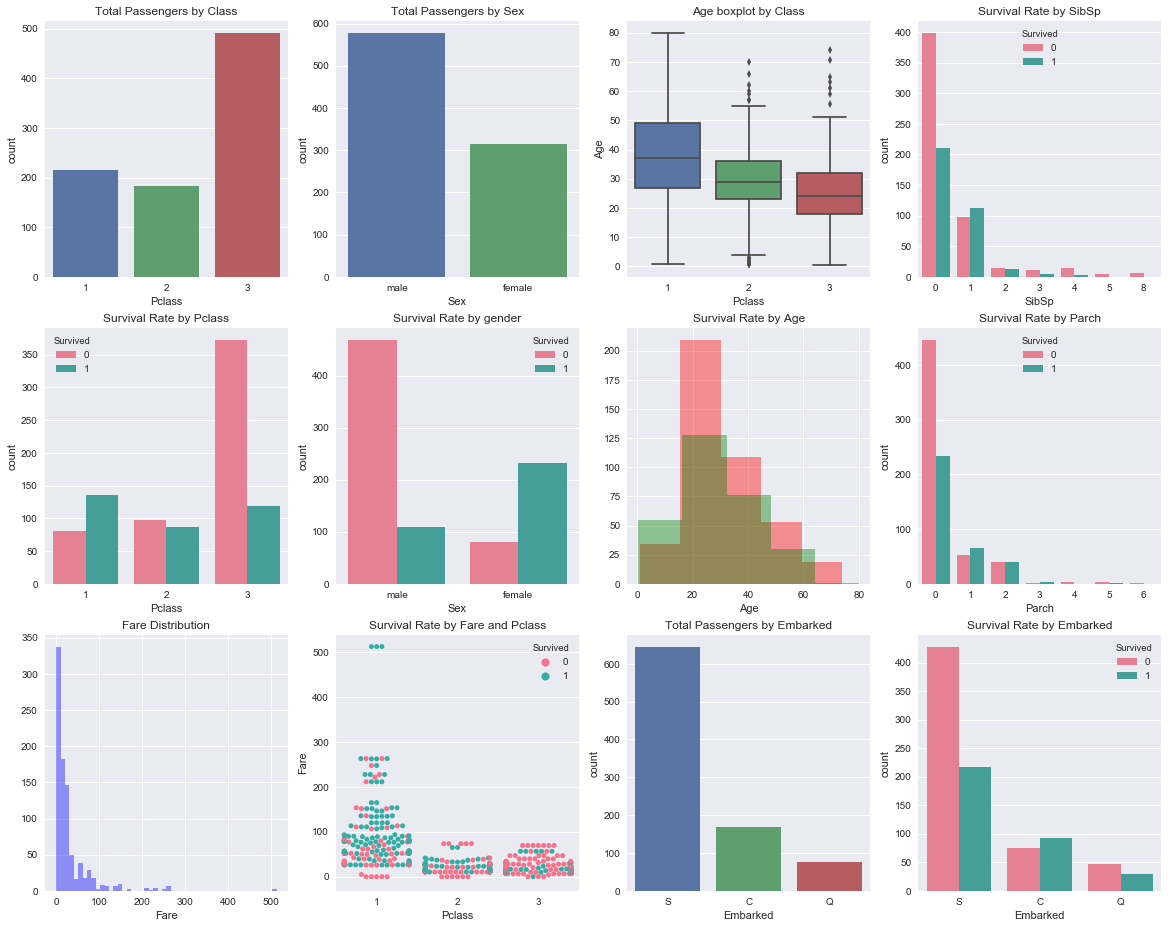

In [77]:

# load libraries of anlysis and visualization
import numpy as np
import pandas as pd
import re  # Regular Expression operations
import matplotlib.pyplot as plt
%matplotlib inline
 
train = pd.read_csv(r'F:\py\titanic\train.csv')
test = pd.read_csv(r'F:\py\titanic\test.csv')
 
# 观察数据
train.head()  #前5行数据
train.sample(5)  #随机5行数据
train.describe()  #各列统计数据
train.dtypes  #数据类型

# 载入seaborn作图
import seaborn as sns
 
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Pclass',data=train,ax=ax[0,0])
sns.countplot('Sex',data=train,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=train,ax=ax[0,2])
sns.distplot(train['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot('Embarked',data=train,ax=ax[2,2])
 
sns.countplot('SibSp',hue='Survived',data=train,ax=ax[0,3],palette='husl')
sns.countplot('Parch',hue='Survived',data=train,ax=ax[1,3],palette='husl')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[2,3],palette='husl')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1,0],palette='husl')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1,1],palette='husl')
 
sns.distplot(train[train['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train[train['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
 
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train,ax=ax[2,1],palette='husl')
 
ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Sex')
ax[0,2].set_title('Age boxplot by Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Pclass')
ax[1,1].set_title('Survival Rate by gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

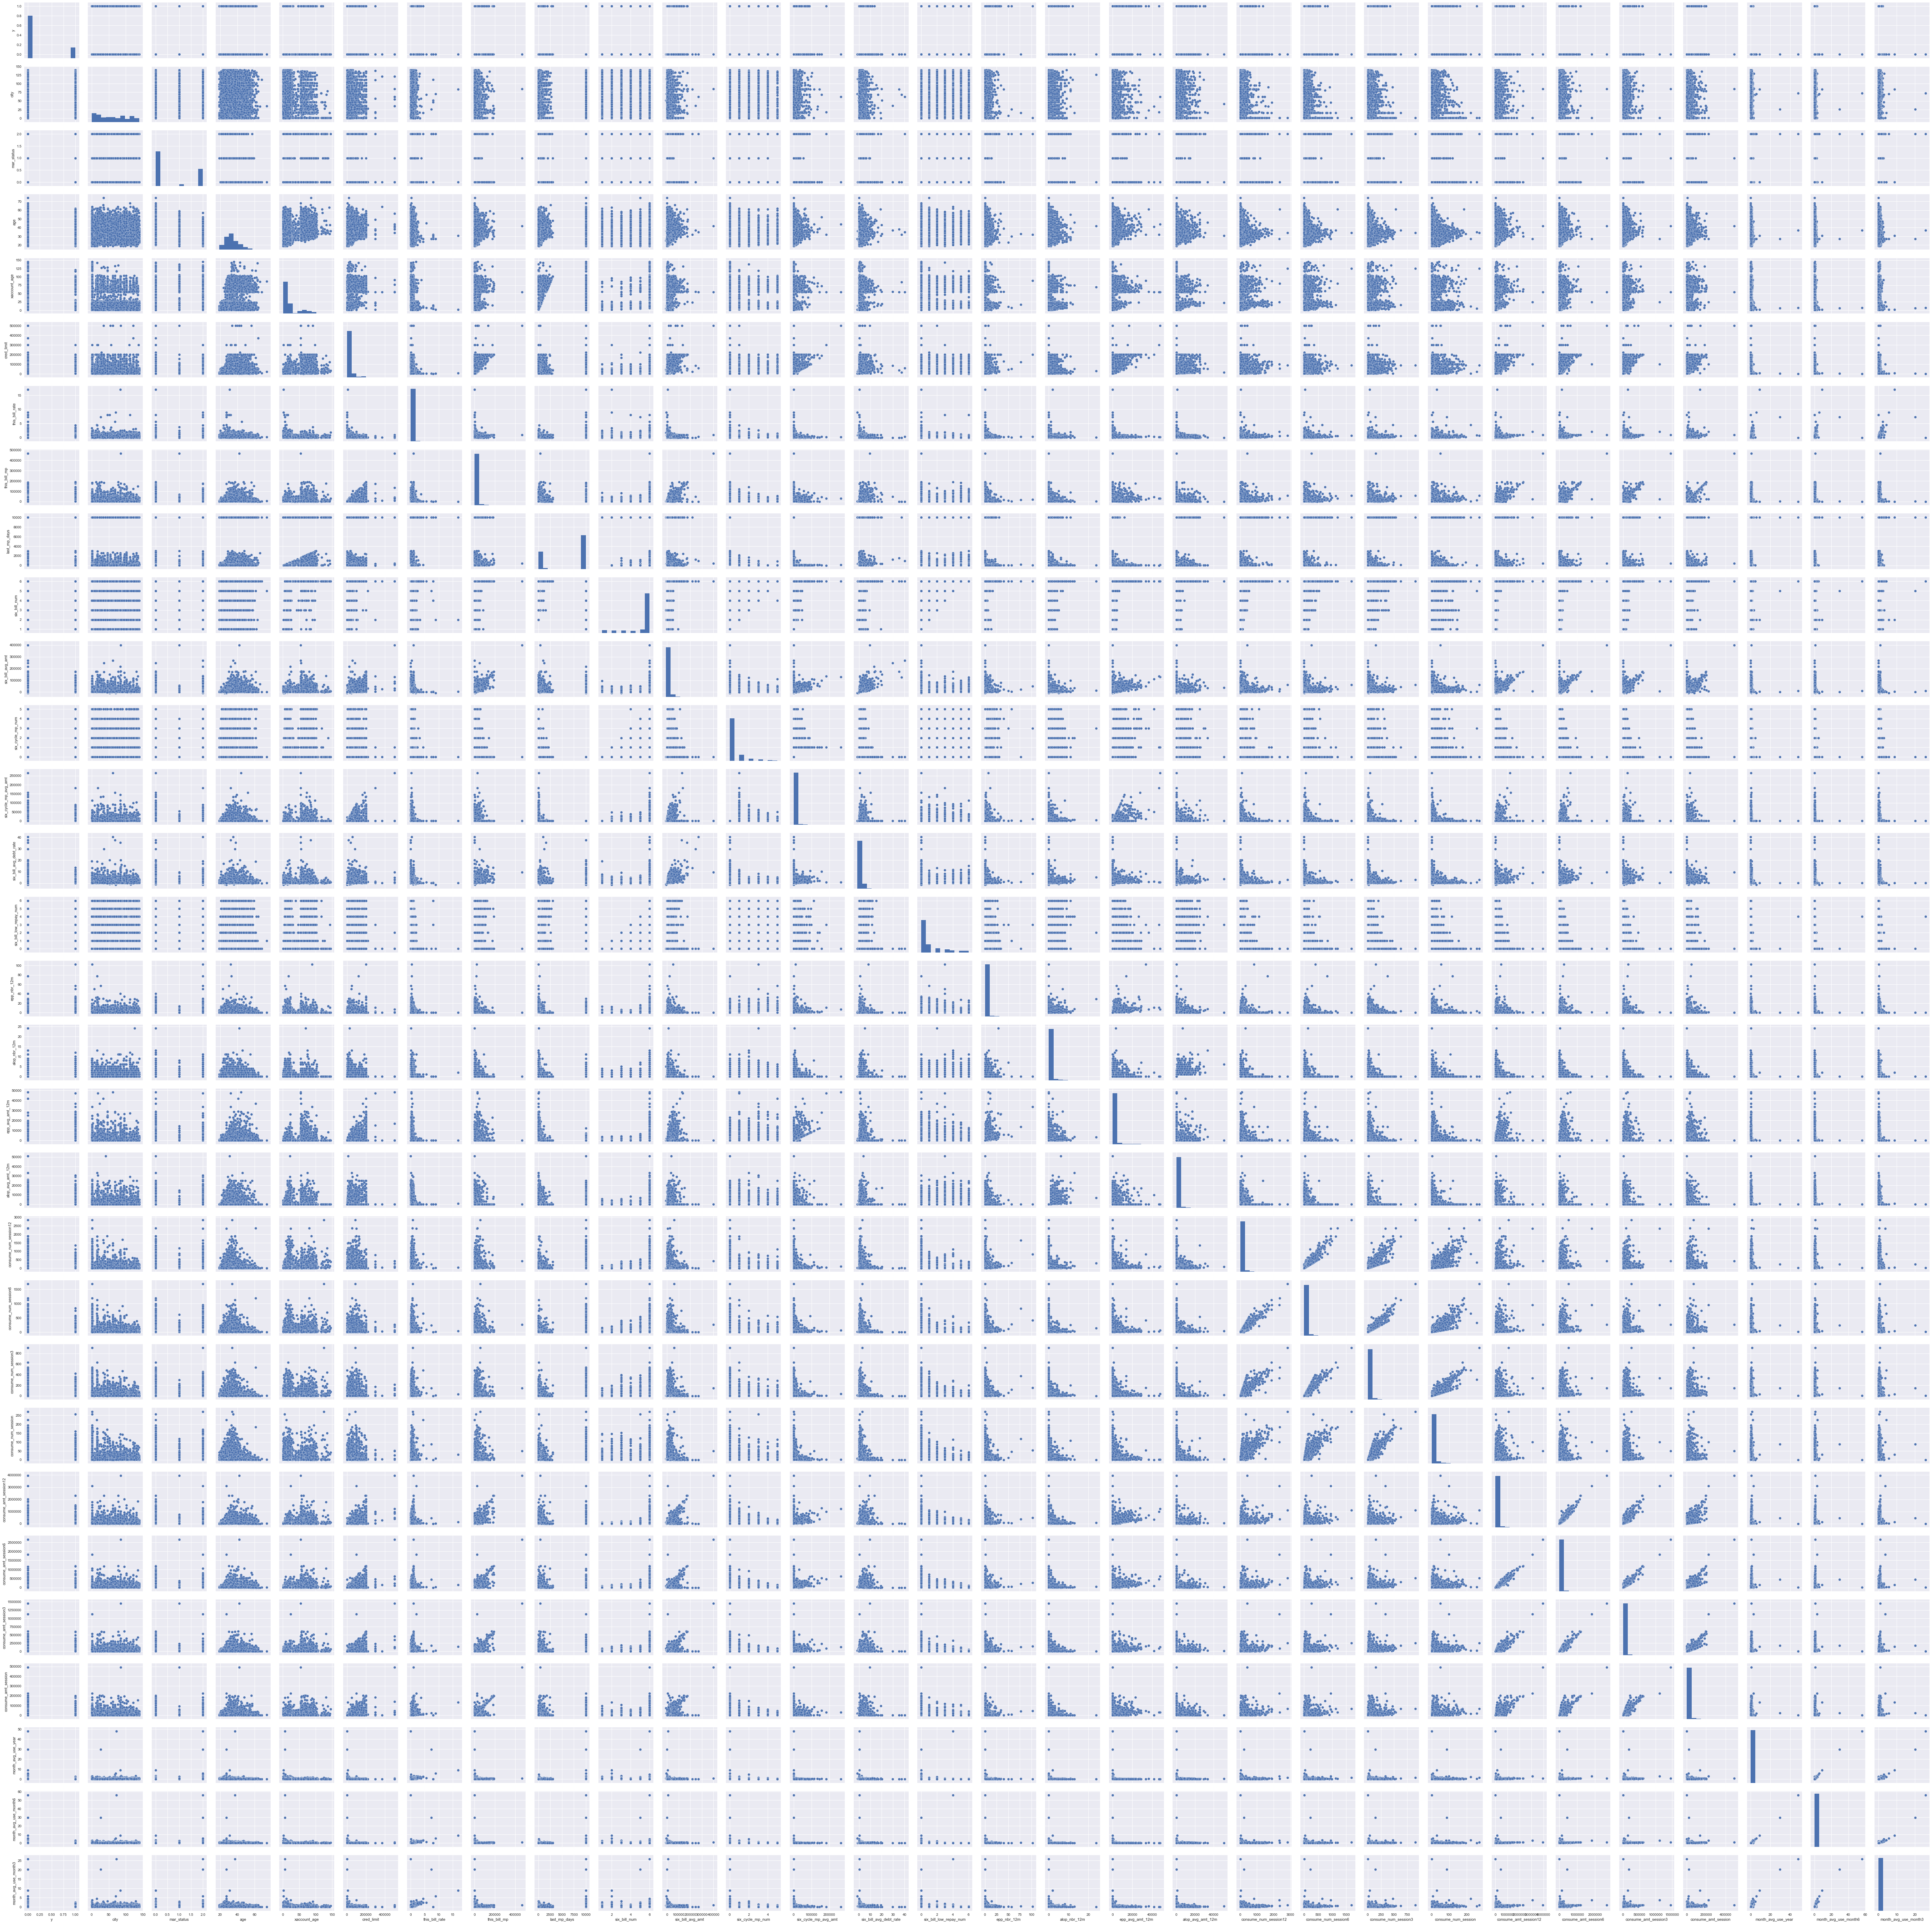

In [14]:
sns.pairplot(data=data)
plt.show()